In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Constants:
all_data_desktop = r'C:\Data Sciences\data\all_data'
in_desktop = r'C:\Data Sciences\data\in'
out_desktop = r'C:\Data Sciences\data\out'

In [10]:
df = pd.read_excel(r'C:\Data Sciences\data\in\spend_data.xlsx').fillna("Other")
df.drop(['Income/Expense','Note2','Amount','Currency','Account3'], axis=1, inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         41 non-null     datetime64[ns]
 1   Account      41 non-null     object        
 2   Category     41 non-null     object        
 3   Subcategory  41 non-null     object        
 4   Note         41 non-null     object        
 5   USD          41 non-null     float64       
 6   Year         41 non-null     int64         
 7   Month        41 non-null     int64         
 8   Day          41 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.0+ KB


In [12]:
df.head()

,Date,Account,Category,Subcategory,Note,USD,Year,Month,Day
0,2022-02-01 08:43:02,AMEX,Groceries,Other,Price chopper,206.80,2022,2,1
1,2022-02-12 19:47:02,AMEX,Apparel,Shoes,Dicks,131.15,2022,2,12
2,2022-02-02 19:50:25,AMEX,Apparel,Clothing,Other,106.00,2022,2,2
3,2022-02-04 19:27:55,AMEX,Entertainment,Other,Frontier Justice,88.77,2022,2,4
4,2022-02-17 22:01:15,AMEX,Groceries,Other,Walmart,79.07,2022,2,17


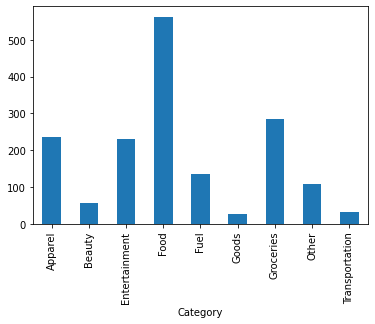

In [13]:
#plot the bar graph of marital status with average value of response_rate
df.groupby('Category')['USD'].sum().plot.bar()
plt.show()

In [14]:
piv_1 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_1

sum         
Month                 2    Total
Category                        
Apparel          237.15   237.15
Beauty            56.00    56.00
Entertainment    231.27   231.27
Food             562.88   562.88
Fuel             135.67   135.67
Goods             25.44    25.44
Groceries        285.87   285.87
Other            106.87   106.87
Transportation    31.00    31.00
Total           1672.15  1672.15

In [15]:
piv_2 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_2

sum                                                        \
Category    Apparel Beauty Entertainment    Food    Fuel  Goods Groceries   
Subcategory                                                                 
Beverages      0.00      0          0.00   75.21    0.00   0.00      0.00   
Car            0.00      0          0.00    0.00    0.00   0.00      0.00   
Clothing     106.00      0          0.00    0.00    0.00   0.00      0.00   
Cosmetics      0.00     56          0.00    0.00    0.00   0.00      0.00   
Dinner         0.00      0          0.00   19.48    0.00   0.00      0.00   
Eating out     0.00      0          0.00  436.97    0.00   0.00      0.00   
Other          0.00      0        231.27    0.00  135.67  25.44    285.87   
Sammie         0.00      0          0.00    0.00    0.00   0.00      0.00   
Shoes        131.15      0          0.00    0.00    0.00   0.00      0.00   
Snacks         0.00      0          0.00   31.22    0.00   0.00      0.00   
Total        237.15     56        231.27  562.88  135.67  25.44    285.87   

                                             
Category      Other Transportation    Total  
Subcategory                                  
Beverages      0.00              0    75.21  
Car            0.00             31    31.00  
Clothing       0.00              0   106.00  
Cosmetics      0.00              0    56.00  
Dinner         0.00              0    19.48  
Eating out     0.00              0   436.97  
Other         33.25              0   711.50  
Sammie        73.62              0    73.62  
Shoes          0.00              0   131.15  
Snacks         0.00              0    31.22  
Total        106.87             31  1672.15

In [16]:
piv_3 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category','Subcategory'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),0)

df_piv_3 = pd.DataFrame(piv_3)
df_piv_3.to_excel(out_desktop + '\piv_3.xlsx')
df_piv_3

sum        
Month                            2   Total
Category       Subcategory                
Apparel        Clothing      106.0   106.0
               Shoes         131.0   131.0
Beauty         Cosmetics      56.0    56.0
Entertainment  Other         231.0   231.0
Food           Beverages      75.0    75.0
               Dinner         19.0    19.0
               Eating out    437.0   437.0
               Snacks         31.0    31.0
Fuel           Other         136.0   136.0
Goods          Other          25.0    25.0
Groceries      Other         286.0   286.0
Other          Other          33.0    33.0
               Sammie         74.0    74.0
Transportation Car            31.0    31.0
Total                       1672.0  1672.0

In [17]:
piv_4 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory','Note'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_4

sum                                       \
Category                         Apparel Beauty Entertainment    Food    Fuel   
Subcategory Note                                                                
Beverages   Buddy's                 0.00      0          0.00   12.91    0.00   
            Callahan                0.00      0          0.00   53.68    0.00   
            Starbucks               0.00      0          0.00    8.62    0.00   
Car         Carwash                 0.00      0          0.00    0.00    0.00   
            Casey's                 0.00      0          0.00    0.00    0.00   
Clothing    Other                 106.00      0          0.00    0.00    0.00   
Cosmetics   Scotch and Scissors     0.00     56          0.00    0.00    0.00   
Dinner      McDonald's              0.00      0          0.00   19.48    0.00   
Eating out  Chipolte                0.00      0          0.00   25.00    0.00   
            Culvers                 0.00      0          0.00   17.29    0.00   
            El Patron               0.00      0          0.00   55.38    0.00   
            First Watch             0.00      0          0.00   57.12    0.00   
            Louisburg BBQ           0.00      0          0.00   60.17    0.00   
            McDonald's              0.00      0          0.00   78.30    0.00   
            Panda Express           0.00      0          0.00   10.00    0.00   
            Sarpinos                0.00      0          0.00   50.13    0.00   
            Timbercreek             0.00      0          0.00   28.58    0.00   
            Toro Loco               0.00      0          0.00   55.00    0.00   
Other       Amazon                  0.00      0          0.00    0.00    0.00   
            Casey's                 0.00      0          0.00    0.00  135.67   
            Frontier Justice        0.00      0         88.77    0.00    0.00   
            Gaming                  0.00      0          7.50    0.00    0.00   
            Google Services         0.00      0          0.00    0.00    0.00   
            Menards                 0.00      0          0.00    0.00    0.00   
            Price chopper           0.00      0          0.00    0.00    0.00   
            Urban Air               0.00      0        115.00    0.00    0.00   
            Video Games             0.00      0         20.00    0.00    0.00   
            Walmart                 0.00      0          0.00    0.00    0.00   
Sammie      Petsmart                0.00      0          0.00    0.00    0.00   
Shoes       Dicks                 131.15      0          0.00    0.00    0.00   
Snacks      Casey's                 0.00      0          0.00   19.19    0.00   
            QT                      0.00      0          0.00   12.03    0.00   
Total                             237.15     56        231.27  562.88  135.67   

                                                                          \
Category                          Goods Groceries   Other Transportation   
Subcategory Note                                                           
Beverages   Buddy's                0.00      0.00    0.00              0   
            Callahan               0.00      0.00    0.00              0   
            Starbucks              0.00      0.00    0.00              0   
Car         Carwash                0.00      0.00    0.00             15   
            Casey's                0.00      0.00    0.00             16   
Clothing    Other                  0.00      0.00    0.00              0   
Cosmetics   Scotch and Scissors    0.00      0.00    0.00              0   
Dinner      McDonald's             0.00      0.00    0.00              0   
Eating out  Chipolte               0.00      0.00    0.00              0   
            Culvers                0.00      0.00    0.00              0   
            El Patron              0.00      0.00    0.00              0   
            First Watch            0.00      0.00    0.0